In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# PREPARE DATA FOR NEURAL NETWORK
X_train = X_train / 255.0


X_test = X_test / 255.0


X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=2)
print("x_train: ",X_train.shape)
print("x_val: ",X_val.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)

x_train:  (54000, 28, 28, 1)
x_val:  (6000, 28, 28, 1)
y_train:  (54000, 10)
y_val:  (6000, 10)


Diagnostics.</br>
Weight Initialization.</br>
Learning Rate.</br>
Activation Functions.</br>
Network Topology.</br>
Batches and Epochs.</br>
Regularization.</br>
Optimization and Loss.</br>
Early Stopping.</br>

# Trying Different Network Topologies

**Example 1**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='Adam', 
                  metrics=['accuracy'])
    return model

**Example 2**

In [ ]:
 def create_model_2():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model.add(MaxPool2D())
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64,kernel_size=5,activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model
    

**Example 3**

In [ ]:
def create_model_3(optimizer='adam', init_mode='uniform', neurons=256, activation='relu'):
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation=activation,input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation=activation))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(neurons, activation = "relu", kernel_initializer=init_mode))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))

    model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
    return model

# Model Training/ Model Checkpoints

In [ ]:
model = create_model_3()

In [ ]:
from keras.callbacks import ModelCheckpoint
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=5,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           vertical_flip=False)
datagen.fit(X_train)

In [ ]:
batch_size=32
epochs=100

In [ ]:
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(X_test,y_test),
                            steps_per_epoch=1600//batch_size, callbacks=callbacks_list);

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 7s 114ms/step - loss: 2.2223 - accuracy: 0.1744 - val_loss: 1.7027 - val_accuracy: 0.5467

Epoch 00001: val_accuracy improved from -inf to 0.54670, saving model to weights.best.hdf5
Epoch 2/100
50/50 [==============================] - 5s 111ms/step - loss: 1.4520 - accuracy: 0.5194 - val_loss: 0.5762 - val_accuracy: 0.8476

Epoch 00002: val_accuracy improved from 0.54670 to 0.84760, saving model to weights.best.hdf5
Epoch 3/100
50/50 [==============================] - 6s 114ms/step - loss: 0.8825 - accuracy: 0.7163 - val_loss: 0.3491 - val_accuracy: 0.9137

Epoch 00003: val_accuracy improved from 0.84760 to 0.91370, saving model to weights.best.hdf5
Epoch 4/100
50/50 [==============================] - 6s 115ms/step - loss: 0.7118 - accuracy: 0.7800 - val_loss: 0.2921 - val_accuracy: 0.9199

Epoch 00004: val_accuracy improved from 0.91370 to 0.91990, saving model to weights.best.hdf5
Epoch 5/100
50/50 [==============================] 

Check this out for more callbacks examples including early stopping, https://www.programcreek.com/python/example/99268/keras.callbacks

# Evaluating Model Performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


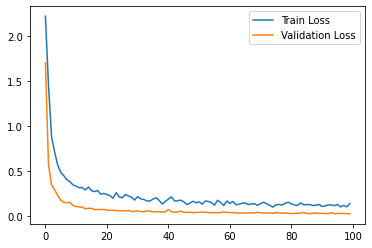

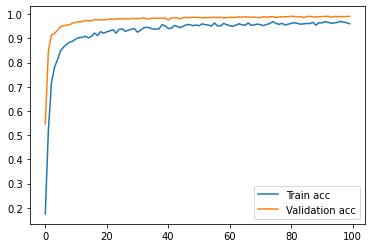

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

# GridSearchCV

In [ ]:
model = KerasClassifier(build_fn=create_model_3, batch_size=100, epochs=32) 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Use scikit-learn to grid search 
# other hyperparameters to try in grid search
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']  


##############################################################
# grid search epochs, batch size
epochs = [1, 10,100] # add 50, 100, 150 etc
batch_size = [32,64,128] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
X_subset= X_train[0:500, :] ## not recommended to do this as this part was only done to speed up the process
y_subset= y_train[0:500, :] 
grid = GridSearchCV(model, param_grid=param_grid,scoring=None)
grid_result = grid.fit(X_subset, y_subset) 

4/4 [==============================] - 0s 9ms/step - loss: 2.2519 - accuracy: 0.1700
Epoch 1/10
13/13 [==============================] - 1s 40ms/step - loss: 2.2978 - accuracy: 0.1350
Epoch 2/10
13/13 [==============================] - 1s 41ms/step - loss: 2.2304 - accuracy: 0.2325
Epoch 3/10
13/13 [==============================] - 1s 40ms/step - loss: 2.0148 - accuracy: 0.3475
Epoch 4/10
13/13 [==============================] - 1s 41ms/step - loss: 1.6480 - accuracy: 0.4575
Epoch 5/10
13/13 [==============================] - 1s 40ms/step - loss: 1.2862 - accuracy: 0.5775
Epoch 6/10
13/13 [==============================] - 1s 41ms/step - loss: 1.0298 - accuracy: 0.6400
Epoch 7/10
13/13 [==============================] - 1s 40ms/step - loss: 0.8190 - accuracy: 0.7300
Epoch 8/10
13/13 [==============================] - 1s 39ms/step - loss: 0.7170 - accuracy: 0.7350
Epoch 9/10
13/13 [==============================] - 1s 41ms/step - loss: 0.5482 - accuracy: 0.8275
Epoch 10/10
4/4 [=======

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.946000 using {'batch_size': 32, 'epochs': 100}
